In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style='darkgrid')

In [3]:
output_dir = 'outputs_10_property_distribution_analysis'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [4]:
## Test data (navitoclax, ABT-737)
baselines = {
    'bcl2':{'navitoclax':9.745, 'abt737':8.392},
    'bclxl':{'navitoclax':7.524, 'abt737':9.042},
    'bclw':{'navitoclax':6.597, 'abt737':7.400},
}

In [5]:
## Train data
filepath_tr = os.path.join(os.pardir, 'data', 'zinc15', 'zinc15_train_full.csv')
df_tr = pd.read_csv(filepath_tr).loc[:,('ba_bcl2', 'ba_bclxl', 'ba_bclw')].rename(columns={'ba_bcl2':'bcl2', 'ba_bclxl':'bclxl', 'ba_bclw':'bclw'})

In [6]:
## generated by ReBADD-SE
filepath_rebadd = os.path.join('outputs_7_calculate_properties_generated', 'frag+reinforce+scst+offpolicy', 'smi_after.csv.0')
df_rebadd = pd.read_csv(filepath_rebadd).loc[:,('bcl2', 'bclxl', 'bclw')].drop_duplicates()

In [7]:
## generated by RationaleRL
filepath_rationale = os.path.join('baseline', 'RationaleRL', 'smi_after.csv.0')
df_rationale = pd.read_csv(filepath_rationale).loc[:,('bcl2', 'bclxl', 'bclw')].drop_duplicates()

In [8]:
## generated by MARS
filepath_mars = os.path.join('baseline', 'MARS', 'smi_after.csv.0')
df_mars = pd.read_csv(filepath_mars).loc[:,('bcl2', 'bclxl', 'bclw')].drop_duplicates()

In [9]:
## generated by ReLeaSE
filepath_release = os.path.join('baseline', 'ReLeaSE', 'smi_after.csv.0')
df_release = pd.read_csv(filepath_release).loc[:,('bcl2', 'bclxl', 'bclw')].drop_duplicates()

In [10]:
## generated by MolGPT
filepath_molgpt = os.path.join('baseline', 'MolGPT', 'smi_after.csv.0')
df_molgpt = pd.read_csv(filepath_molgpt).loc[:,('bcl2', 'bclxl', 'bclw')].drop_duplicates()

In [11]:
df_tr_ = df_tr.copy()
df_tr_.loc[:,'label'] = 'Training'

df_rebadd_ = df_rebadd.copy()
df_rebadd_.loc[:,'label'] = 'ReBADD-SE'

df_rationale_ = df_rationale.copy()
df_rationale_.loc[:,'label'] = 'RationaleRL'

df_mars_ = df_mars.copy()
df_mars_.loc[:,'label'] = 'MARS'

df_release_ = df_release.copy()
df_release_.loc[:,'label'] = 'ReLeaSE'

df_molgpt_ = df_molgpt.copy()
df_molgpt_.loc[:,'label'] = 'MolGPT'

df_merged = pd.concat((df_rebadd_, df_rationale_, df_mars_, df_release_, df_molgpt_, df_tr_), ignore_index=True)

In [12]:
df_merged.groupby(by='label').mean(numeric_only=True)

,bcl2,bclxl,bclw
label,,,
MARS,8.274378,8.001646,7.304844
MolGPT,6.556705,6.337257,6.026110
RationaleRL,8.768249,8.393327,7.225216
ReBADD-SE,9.406369,9.014667,8.227796
ReLeaSE,6.533729,6.575654,6.479451
Training,5.986288,5.882168,5.702810


In [13]:
df_merged.groupby(by='label').std(numeric_only=True)

,bcl2,bclxl,bclw
label,,,
MARS,0.814171,0.730061,0.555871
MolGPT,0.791140,0.859026,0.629931
RationaleRL,0.864585,0.732160,0.532307
ReBADD-SE,0.494770,0.326723,0.295898
ReLeaSE,0.841960,1.028695,0.756427
Training,0.665718,0.789411,0.622243


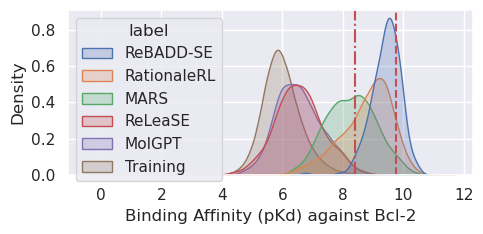

In [28]:
target = 'bcl2'

fig, ax = plt.subplots(1,1,figsize=(5,2.5))

_ = sns.kdeplot(data=df_merged, x=target, hue='label', common_norm=False, fill=True, legend=True, ax=ax)

ax.axvline(x=baselines[target]['navitoclax'], c='r', linestyle='--', label='navitoclax')
ax.axvline(x=baselines[target]['abt737'], c='r', linestyle='-.', label='abt737')

ax.set_xlabel('Binding Affinity (pKd) against Bcl-2')

plt.tight_layout()
#plt.savefig(os.path.join(output_dir, "BA_distribution_analysis_bcl2.png"), dpi=600)

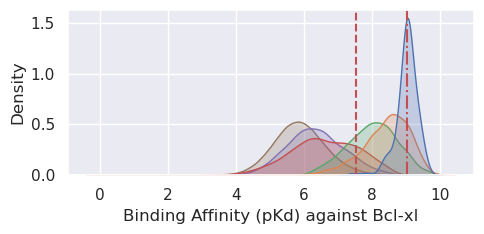

In [26]:
target = 'bclxl'

fig, ax = plt.subplots(1,1,figsize=(5,2.5))

_ = sns.kdeplot(data=df_merged, x=target, hue='label', common_norm=False, fill=True, legend=False, ax=ax)

ax.axvline(x=baselines[target]['navitoclax'], c='r', linestyle='--', label='navitoclax')
ax.axvline(x=baselines[target]['abt737'], c='r', linestyle='-.', label='abt737')

ax.set_xlabel('Binding Affinity (pKd) against Bcl-xl')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "BA_distribution_analysis_bclxl.png"), dpi=600)

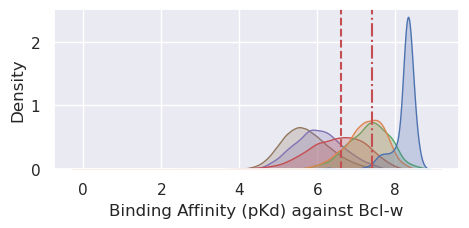

In [27]:
target = 'bclw'

fig, ax = plt.subplots(1,1,figsize=(5,2.5))

_ = sns.kdeplot(data=df_merged, x=target, hue='label', common_norm=False, fill=True, legend=False, ax=ax)

ax.axvline(x=baselines[target]['navitoclax'], c='r', linestyle='--', label='navitoclax')
ax.axvline(x=baselines[target]['abt737'], c='r', linestyle='-.', label='abt737')

ax.set_xlabel('Binding Affinity (pKd) against Bcl-w')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "BA_distribution_analysis_bclw.png"), dpi=600)